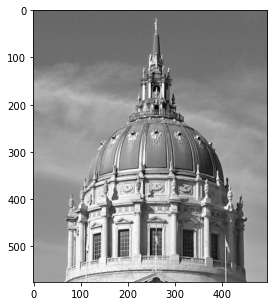

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

# Read in the image
image = cv2.imread('1_3_Types_of_Features_Image_Segmentation/images/city_hall_zoom.png')

# Make a copy
image_copy = np.copy(image)

# Change color to RGB
image_copy = cv2.cvtColor(image_copy,cv2.COLOR_BGR2RGB)

gray = cv2.cv2.cvtColor(image_copy,cv2.COLOR_RGB2GRAY)

f, ax = plt.subplots(1,1,figsize=(5,5))

ax.imshow(gray,cmap='gray')

### Detect corners

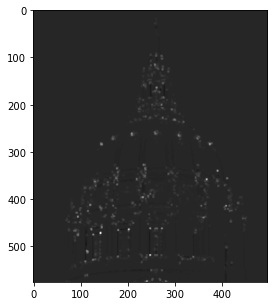

In [20]:
# Convert to float type
gray = np.float32(gray)

# Detect corners
dst = cv2.cornerHarris(gray,3,5,0.04)

#Dilate corner image to enhance corner points
dst = cv2.dilate(dst, None)

f, ax = plt.subplots(1,1,figsize=(5,5))
ax.imshow(dst,cmap='gray')

### Select and display strong corners

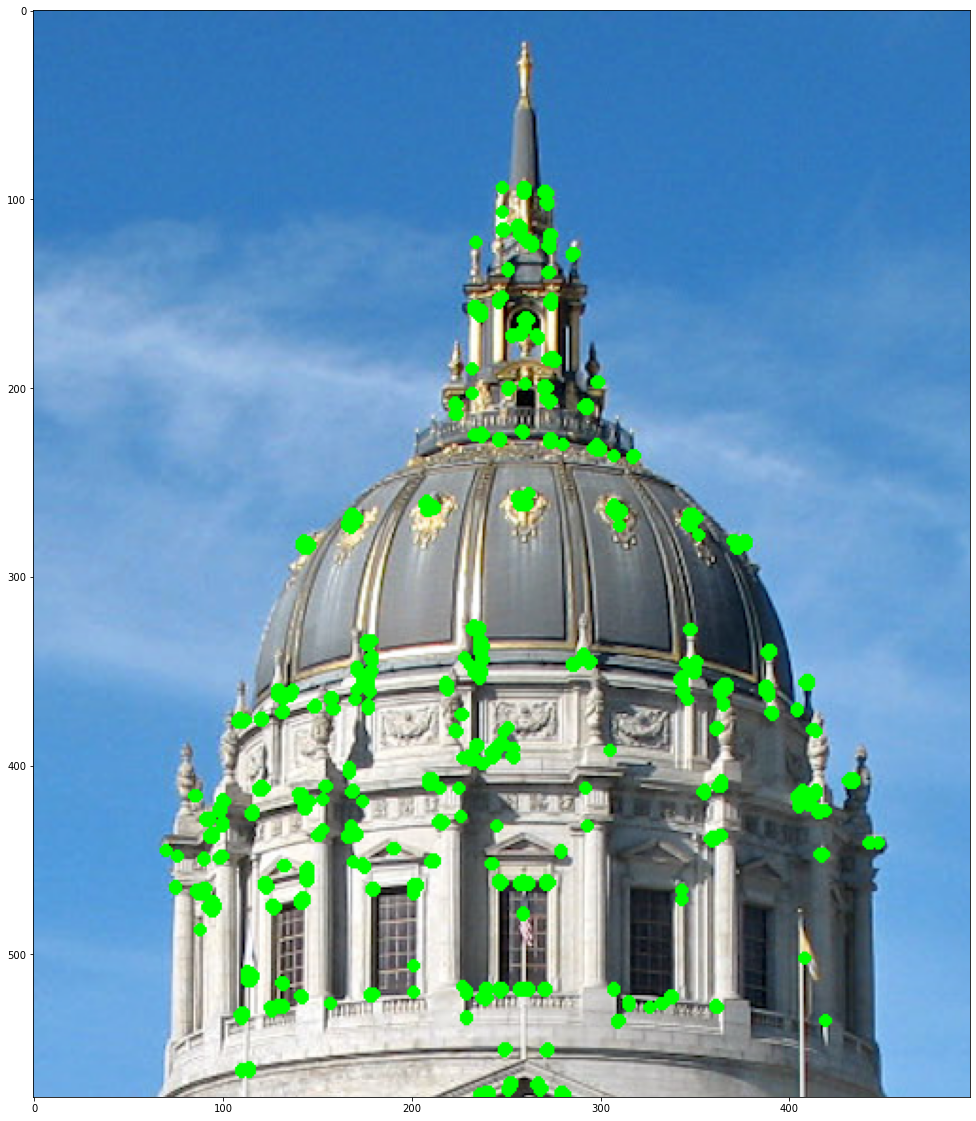

In [26]:
# Define a threshold for extracting strong corners
# This value may vary depending on the image
thresh = 0.1*dst.max()

# Create an image copy to draw corners on
corner_image = np.copy(image_copy)

# Iterate through all the corners and draw them on the image (if they pass the threshold)
for j in range(0, dst.shape[0]):
    for i in range(0,dst.shape[1]):
        if(dst[j,i] > thresh):
            # image, center pt, radius, color, thickness
            cv2.circle(corner_image, (i,j), 2, (0,255,0), 1)

f, ax = plt.subplots(1,1,figsize=(20,20))
ax.imshow(corner_image)